# Desarrollo de producto de datos

# Cliente

Alumno: Alejandro Méndez Miranda

Para este trabajo al igual que para el servidor, se reutilizó el código realizando modificaciones para presentar el conteo de objetos, donde ya no se entrega una imagen sino un string.

## Carga de librerías

In [1]:
import os
import io
import cv2
import requests
import numpy as np
from IPython.display import Image, display

In [2]:
def response_from_server(url, image_file, verbose=True):
    """Hace una solicitud POST al servidor y retorna la respuesta.

    Argumentos:
        url (str): URL a la que se envía la consulta.
        image_file (_io.BufferedReader): Archivo a subir, debe ser una imagen.
        verbose (bool): True si se debe imprimir el estado de la solicitud. False en otro caso.

    Retorna:
        requests.models.Response: Respuesta del servidor.
    """
    
    files = {'file': image_file}
    response = requests.post(url, files=files)
    status_code = response.status_code
    if verbose:
        msg = "¡Todo funcionó bien!" if status_code == 200 else "Hubo un error al ejecutar la solicitud."
        print(msg)
    return response

# Prueba endpoint 1: Predicción de categorías y su caja correspondiente.

In [3]:
def display_image_from_response(response):
    """Despliega la imagen de la respuesta del servidor.

    Argumentos:
        response (requests.models.Response): La respuesta del servidor luego de la detección de objetos
    """
    
    image_stream = io.BytesIO(response.content)
    image_stream.seek(0)
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    filename = "image_with_objects.jpeg"
    cv2.imwrite(f'images_predicted/{filename}', image)
    display(Image(f'images_predicted/{filename}'))

Se realizó las predicciones de la imagen fruit con dos valores de confidence. Además se probó con otras imágenes para analizar las funciones creadas.

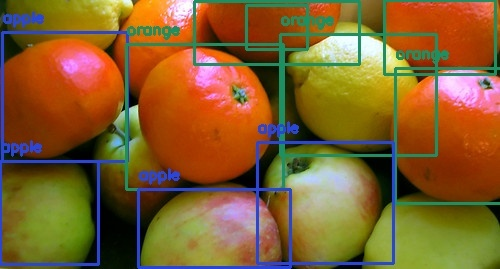

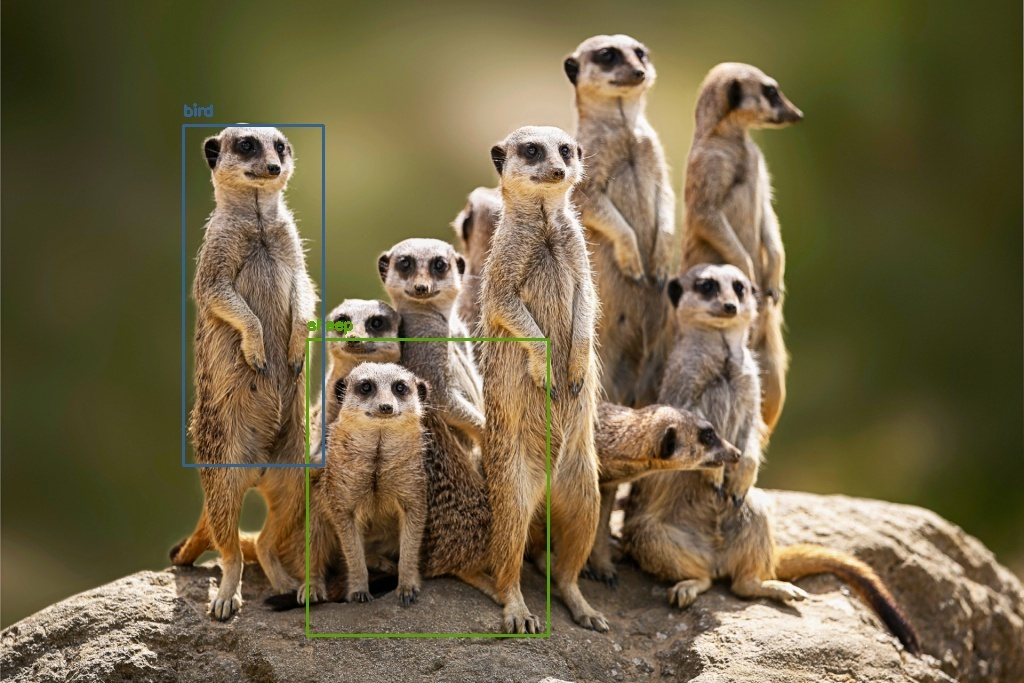

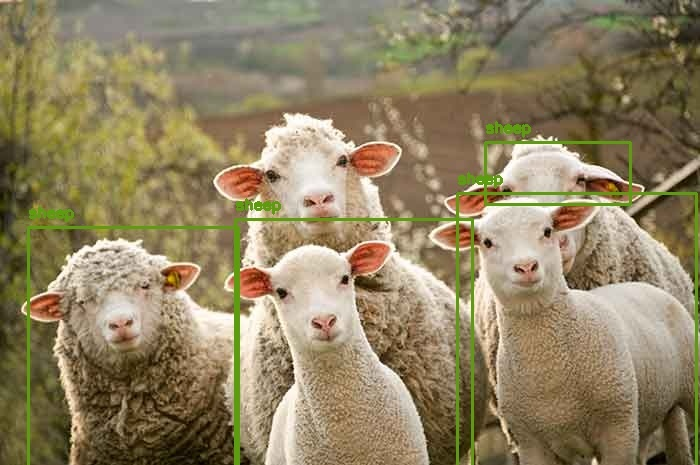

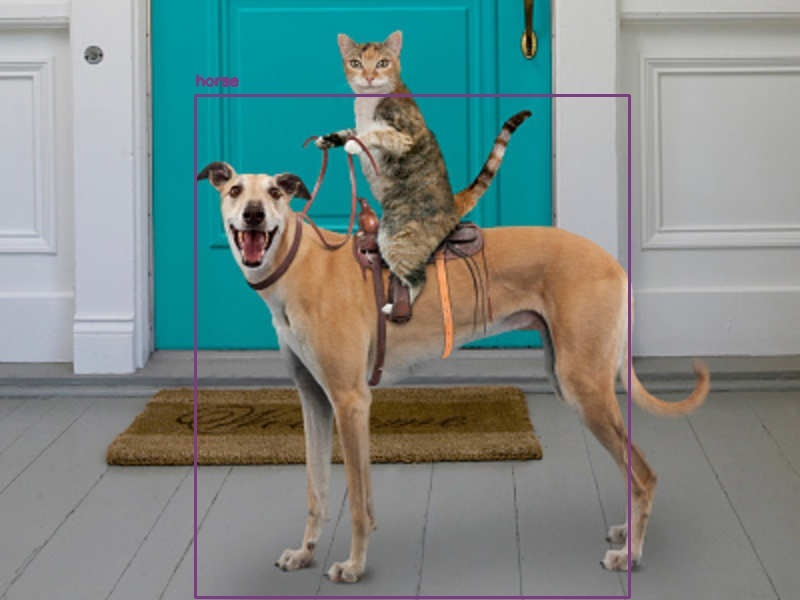

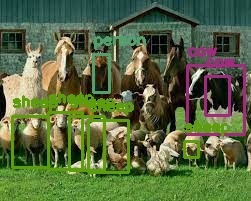

In [4]:
base_url = 'http://localhost:8000'
endpoint = '/predict'
model = 'yolov3-tiny'
confidence = 0.01

url_with_endpoint_no_params = base_url + endpoint
full_url = url_with_endpoint_no_params + "?model=" + model + "&confidence=" + str(confidence)


image_files = [
    'fruits.jpg',
    'suri.jpg',
    'sheeps.jpg',
    'dofs2.jpg',
    'farm.jpg'
]

for image_file in image_files:
    with open(f"images/{image_file}", "rb") as image_file:
        prediction = response_from_server(full_url, image_file, verbose=False)
    
    display_image_from_response(prediction)

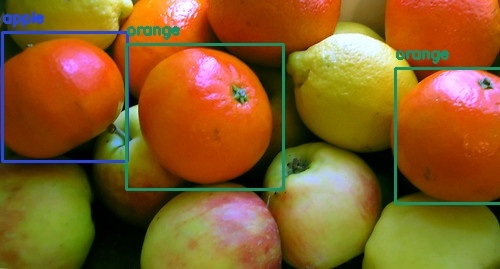

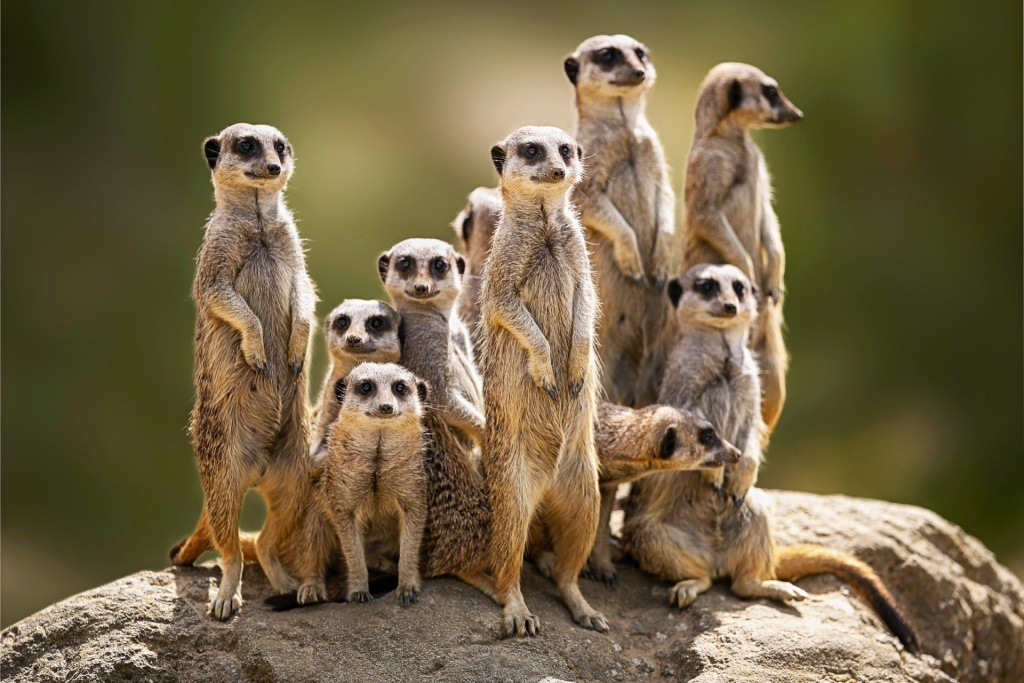

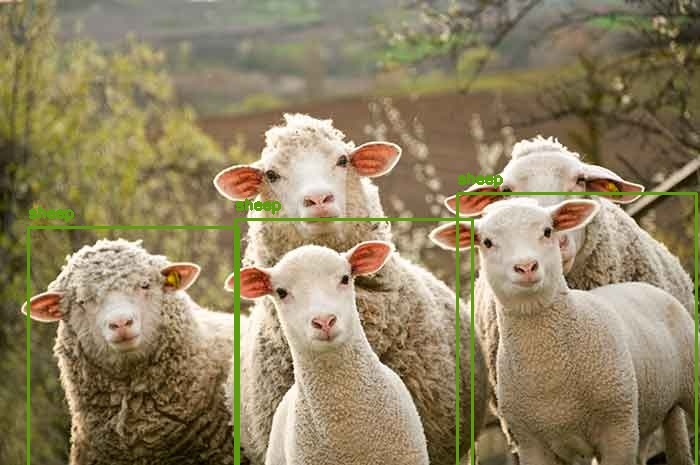

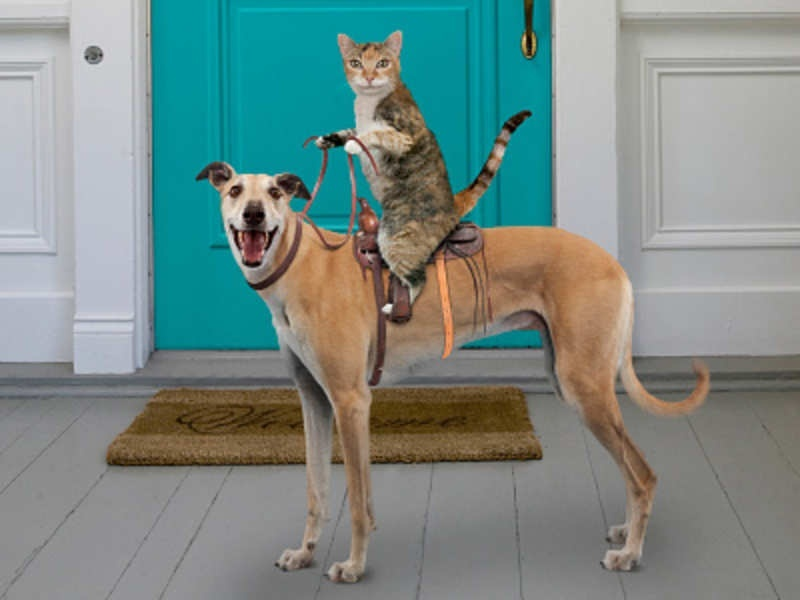

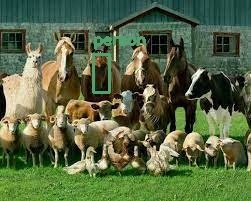

In [5]:
base_url = 'http://localhost:8000'
endpoint = '/predict'
model = 'yolov3-tiny'
confidence = 0.5

url_with_endpoint_no_params = base_url + endpoint
full_url = url_with_endpoint_no_params + "?model=" + model + "&confidence=" + str(confidence)


image_files = [
    'fruits.jpg',
    'suri.jpg',
    'sheeps.jpg',
    'dofs2.jpg',
    'farm.jpg'
]

for image_file in image_files:
    with open(f"images/{image_file}", "rb") as image_file:
        prediction = response_from_server(full_url, image_file, verbose=False)
    
    display_image_from_response(prediction)

Al aumentar el valor de confidence perdemos muchas predicciones, algunas malas y otras buenas, depende mucho lo que se quiere predecir. En el ejemplo de las suricatas las dos predicciones estaban erradas, pero el modelo no logra predecir las suricatas (puede que nunca estuviesen en el dataset) y el caso del perro caballo no logra predecir que es un perro ni tampoco logra predecir que hay un gato (Categorías que uno espera que estén en el modelo). Pero por ejemplo en la imagen final de la granja elimina muchas buenas predicciones de ovejas. Al menos, aunque las predicciones no son perfectas, la imagen con muchas ovejas logró predicciones de muchas ovejas.

# Prueba endpoint 2: countObjects

Se utiliza la misma función anteriormente creada pero ahora el objeto retornado no es una imagen, es un string.

In [6]:
import os
import io
import cv2
import requests
import numpy as np
from IPython.display import Image, display

In [7]:
base_url = 'http://localhost:8000'
endpoint = '/countObjects'
model = 'yolov3-tiny'
confidence = 0.1
object_det = "sheep"

url_with_endpoint_no_params = base_url + endpoint
full_url = url_with_endpoint_no_params + "?model=" + model + "&confidence=" + str(confidence) + "&countobject=" +object_det


In [8]:
base_url = 'http://localhost:8000'
endpoint = '/countObjects'
model = 'yolov3-tiny'
confidence = 0.1
object_det = "sheep"

url_with_endpoint_no_params = base_url + endpoint
full_url = url_with_endpoint_no_params + "?model=" + model + "&confidence=" + str(confidence) + "&countobject=" +object_det


image_files = [
    'fruits.jpg',
    'suri.jpg',
    'sheeps.jpg',
    'dofs2.jpg',
    'farm.jpg'
]

for i,image_file in enumerate(image_files):
    with open(f"images/{image_file}", "rb") as image_file:
        #En este caso la predicción se trata como un string según se formateo
        #en nuestro servidor.
        prediction = response_from_server(full_url, image_file, verbose=False)
        print(f"{image_files[i]:10s} --> " + str(prediction.content)[5:-2])
    

fruits.jpg --> |  Object: sheep  | Count: 0 |
suri.jpg   --> |  Object: sheep  | Count: 1 |
sheeps.jpg --> |  Object: sheep  | Count: 4 |
dofs2.jpg  --> |  Object: sheep  | Count: 0 |
farm.jpg   --> |  Object: sheep  | Count: 5 |


In [9]:
base_url = 'http://localhost:8000'
endpoint = '/countObjects'
model = 'yolov3-tiny'
confidence = 0.1
object_det = ""

url_with_endpoint_no_params = base_url + endpoint
full_url = url_with_endpoint_no_params + "?model=" + model + "&confidence=" + str(confidence) + "&countobject=" +object_det


image_files = [
    'fruits.jpg',
    'suri.jpg',
    'sheeps.jpg',
    'dofs2.jpg',
    'farm.jpg'
]

for i,image_file in enumerate(image_files):
    with open(f"images/{image_file}", "rb") as image_file:
        prediction = response_from_server(full_url, image_file, verbose=False)
        print(f"{image_files[i]:10s} --> " + str(prediction.content)[5:-2])
    

fruits.jpg -->   Object: apple     | Count: 4 ||||  Object: orange    | Count: 6 ||
suri.jpg   -->   Object: bird      | Count: 1 ||||  Object: sheep     | Count: 1 ||
sheeps.jpg -->   Object: sheep     | Count: 4 ||
dofs2.jpg  -->   Object: horse     | Count: 1 ||
farm.jpg   -->   Object: cow       | Count: 2 ||||  Object: person    | Count: 1 ||||  Object: sheep     | Count: 5 ||


In [10]:
base_url = 'http://localhost:8000'
endpoint = '/countObjects'
model = 'yolov3-tiny'
confidence = 0.9


url_with_endpoint_no_params = base_url + endpoint
full_url = url_with_endpoint_no_params + "?model=" + model + "&confidence=" + str(confidence) 


image_files = [
    'fruits.jpg',
    'suri.jpg',
    'sheeps.jpg',
    'dofs2.jpg',
    'farm.jpg'
]

for i,image_file in enumerate(image_files):
    with open(f"images/{image_file}", "rb") as image_file:
        prediction = response_from_server(full_url, image_file, verbose=False)
        print(f"{image_files[i]:10s} --> " + str(prediction.content)[5:-2])
    

fruits.jpg --> No object detected
suri.jpg   --> No object detected
sheeps.jpg -->   Object: sheep     | Count: 1 ||
dofs2.jpg  --> No object detected
farm.jpg   --> No object detected


Los dos conteos fueron realizados correctamente, tanto entregando el objeto que se quiere predecir como si se entregase un string vacío o derechamente ningún parámetro. En el caso que no se encontrase un objeto en la imagen retorna un informativo de que no se encontraron objetos.

# Prueba endpoint 3: countSheeps

In [11]:
base_url = 'http://localhost:8000'
endpoint = '/countSheeps'
model = 'yolov3-tiny'
confidence = 0.1


url_with_endpoint_no_params = base_url + endpoint
full_url = url_with_endpoint_no_params + "?model=" + model + "&confidence=" + str(confidence)


image_files = [
    'fruits.jpg',
    'suri.jpg',
    'sheeps.jpg',
    'dofs2.jpg',
    'farm.jpg'
]

for i,image_file in enumerate(image_files):
    with open(f"images/{image_file}", "rb") as image_file:
        #En este caso la predicción se trata como un string según se formateo
        #en nuestro servidor.
        prediction = response_from_server(full_url, image_file, verbose=False)
        print(f"{image_files[i]:10s} --> " + str(prediction.content)[5:-2])
    

fruits.jpg --> |  Object: sheep  | Count: 0 |
suri.jpg   --> |  Object: sheep  | Count: 1 |
sheeps.jpg --> |  Object: sheep  | Count: 4 |
dofs2.jpg  --> |  Object: sheep  | Count: 0 |
farm.jpg   --> |  Object: sheep  | Count: 5 |


El endpoint final funciona realizando el conteo de ovejas.

# Preguntas teóricas

### 3.1  En base a la disponibilidad de un servidor con el endpoint /countObjects, es decir, un modelo de Machine Learning que realice conteo de objetos en imágenes, plantee una aplicación cliente que pueda crearse para construir un Producto de Datos. Detalle qué tipo de problema resolvería, si se puede aplicar a alguna industria en particular, que usuarios tendría y cómo podría entregar valor a dichos usuarios. ¿Qué métricas de desempeño para el Producto de Datos serían adecuadas en este escenario?


Utilizando un detector de objetos se podría realizar el conteo de cajas en una bodega de repartición por ejemplo, así se podría estimar la disponibilidad de espacio en la bodega y realizar un mejor uso del espacio. Todo esto realizado con un dispositivo movil.

En cuanto a métricas sería importante considerar métricas del modelo cono accuracy, debido a que necesitamos estimar la cantidad de cajas y su localización, si es que no se predice de manera correcta nos generaría un espacio falso que podría disponerse para otra caja.

Igual se pueden considerar métricas de performance, seguimiento o condiciones del lugar. No es lo mismo si se realiza la toma de fotos en un lugar oscuro, las cajas de por si son marrones, cualquier disminución de la luz generaría que no se viera y quizás sea bueno realizar un segumiento de la luminosidad. Podrían ser métricas de cantidad de cajas, una predicción baja de cajas podría significar cosas como que el modelo ya no está prediciendo o que por alguna razón la bodega está vacía, lo cual podría ser preocupante. Podría tomarse la métrica de memoria disponible en el caso que el tamaño de las imágenes comiencen a ser de mucha calidad, etc.

### 3.2 (1 punto) En el escenario que su producto se implemente y comience a tener usuarios. En base a lo visto en clases: ¿Qué dificultades puede tener en el futuro? Enumere 5 de esas dificultades y comente cuál es la importancia de cada una.


Existen muchas dificultades posibles:
    
* Luminosidad: Un cambio en la luminosidad afectaría la detección o no de cajas
* Variación en cajas: Las cajas no son uniformes y pueden tener variadas formas que nuestro modelo no consideró en su creación.
* Variación en bodega: Por alguna razón la bodega puede cambiar su funcionalidad y ahora almacena otros productos.
* Cambio de dispositivo movil: Si cambia el dispositivo, cambia la cámara, lo que influiría en las imágenes.
* Exceso de clientes: Esto podría causar saturación del servidor y sobrepasar los recursos disponibles.
